# Deliverable 3: Model Optimization Attempt #1

### Changes
Dropped: EIN, NAME
Binned: Application_Counts: <528 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 120; hidden_nodes_layer2 = 80; hidden_nodes_layer3 = 40
Activation Functions: hidden layers - relu ; output - sigmoid
Epochs: 100

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from
sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [9]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

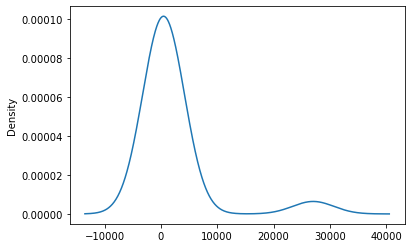

In [11]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 528].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

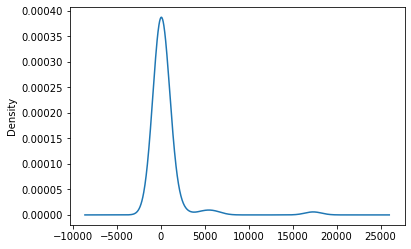

In [14]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()

C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 80)                9680      
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Restore the model weights
# nn.load_weights("checkpoints/weights.100.hdf5")

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 43457.6602 - accuracy: 0.4819
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 37368.0703 - accuracy: 0.4954
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 20633.1426 - accuracy: 0.5011
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 10.1600 - accuracy: 0.5321
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6620 - accuracy: 0.5586 - 414ms/epoch - 2ms/step
Loss: 0.6620279550552368, Accuracy: 0.5586006045341492


In [33]:
# # Export our model to HDF5 file
# nn.save("AlphabetSoupCharity.h5")

# Deliverable 3: Model Optimization Attempt #2

### Changes
Dropped: EIN, NAME, STATUS
Binned: Application_Counts: <528 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 44 hidden_nodes_layer2 = 20; hidden_nodes_layer3 = 10
Activation Functions: hidden layers - leaky_relu ; output - sigmoid
Epochs: 100

Model: "sequential_2"


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 44)                1892      
                                                                 
 dense_9 (Dense)             (None, 20)                900       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,013
Trainable params: 3,013
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 29784.5488 - accuracy: 0.4938
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 20010.7012 - accuracy: 0.493

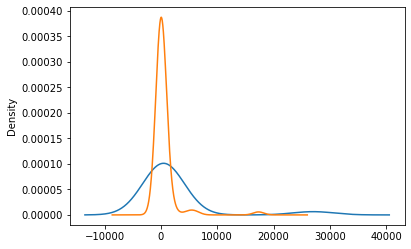

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 528].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 44
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="leaky_relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Restore the model weights
# nn.load_weights("checkpoints/weights.100.hdf5")

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Deliverable 3: Model Optimization Attempt #3

In [ ]:
### Changes
Dropped: EIN, NAME, ASK_AMT, STATUS
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 160; hidden_nodes_layer2 = 80;
Activation Functions: hidden layers - tanh ; output - sigmoid
Epochs: 100

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               6880      
                                                                 
 dense_1 (Dense)             (None, 80)                12880     
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 19,841
Trainable params: 19,841
Non-trainable params: 0
_________________________________________________________________


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5843 - accuracy: 0.7174
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.7262
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7300
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7309
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7317
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accura

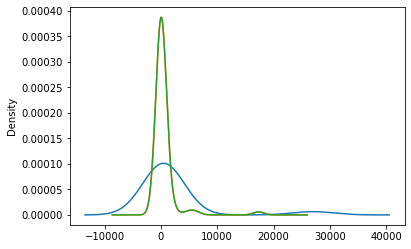

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Restore the model weights
# nn.load_weights("checkpoints/weights.100.hdf5")

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Deliverable 3: Model Optimization Attempt #4

### Changes
Dropped: EIN, NAME, ASK_AMT
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 160; hidden_nodes_layer2 = 80;
Activation Functions: hidden layers - tanh ; output - sigmoid
Epochs: 100

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

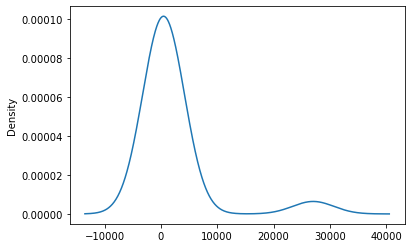

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

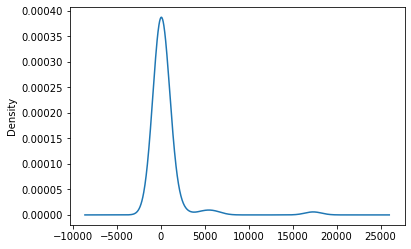

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

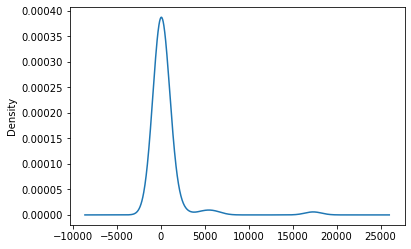

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [12]:
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,1


In [13]:
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
dtype: object

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()

C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               7040      
                                                                 
 dense_1 (Dense)             (None, 80)                12880     
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 20,001
Trainable params: 20,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=5,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Restore the model weights
nn.load_weights("checkpoints/weights.100.hdf5")


Epoch 1/100
785/804 [============================>.] - ETA: 0s - loss: 0.5750 - accuracy: 0.7217
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7212
Epoch 2/100
795/804 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.7289
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7290
Epoch 3/100
782/804 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7302
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7304
Epoch 4/100
793/804 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7306
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7301
Epoch 5/100
781/804 [=======================

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5555 - accuracy: 0.7243 - 567ms/epoch - 2ms/step
Loss: 0.5555437207221985, Accuracy: 0.7243148684501648


In [23]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

# Deliverable 3: Model Optimization Attempt #5

In [ ]:
### Changes
Dropped: EIN, NAME, ASK_AMT
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 160; hidden_nodes_layer2 = 80;
Activation Functions: hidden layers - relu ; output - sigmoid
Epochs: 100

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 160)               7040      
                                                                 
 dense_4 (Dense)             (None, 80)                12880     
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 20,001
Trainable params: 20,001
Non-trainable params: 0
_________________________________________________________________


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5689 - accuracy: 0.7234
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5543 - accuracy: 0.7295
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5519 - accuracy: 0.7321
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5489 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5483 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7334
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7348
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5457 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7357
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5444 - accura

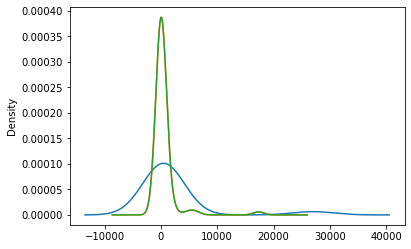

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Restore the model weights
# nn.load_weights("checkpoints/weights.100.hdf5")

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Deliverable 3: Model Optimization Attempt #6

### Changes
Dropped: EIN, NAME, ASK_AMT
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 160; hidden_nodes_layer2 = 120; hidden_nodes_layer3 = 80; hidden_nodes_layer4 = 40
Activation Functions: hidden layers - relu ; output - sigmoid
Epochs: 50

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 160)               7040      
                                                                 
 dense_7 (Dense)             (None, 120)               19320     
                                                                 
 dense_8 (Dense)             (None, 80)                9680      
                                                                 
 dense_9 (Dense)             (None, 40)                3240      
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                                 
Total params: 39,321
Trainable params: 39,321
Non-trainable params: 0
_________________________________________________________________


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5793 - accuracy: 0.7168
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5635 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.7319
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5644 - accuracy: 0.7306
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5555 - accuracy: 0.7306
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.7344
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7329
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.7344
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5644 - accuracy: 0.7358
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5513 - accuracy: 0.7345

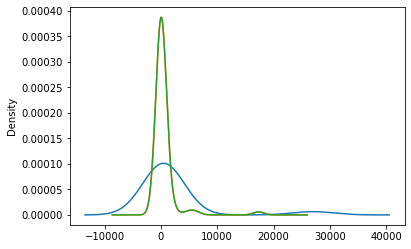

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# # Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# # Restore the model weights
# nn.load_weights("checkpoints/weights.100.hdf5")

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Deliverable 3: Model Optimization Attempt #7

### Changes
Dropped: EIN, NAME, ASK_AMT, STATUS
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 80; hidden_nodes_layer2 = 30; hidden_nodes_layer3 = 10
Activation Functions: hidden layers - relu ; output - sigmoid
Epochs: 50

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 80)                3440      
                                                                 
 dense_28 (Dense)            (None, 30)                2430      
                                                                 
 dense_29 (Dense)            (None, 10)                310       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,191
Trainable params: 6,191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


804/804 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7223
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7303
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7324
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7328
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7318
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7324
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5491 - accuracy: 0.7338
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7336
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7332
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7348
Epoch 11/5

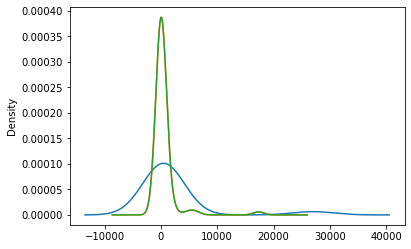

In [9]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
#os.makedirs("checkpoints/",exist_ok=True)
#checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=5,
#     save_weights_only=True,
#     save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

# Restore the model weights
#nn.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,191
Trainable params: 6,191
Non-trainable params: 0
_________________________________________________________________


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Epoch 1/50
785/804 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7215
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7216
Epoch 2/50
786/804 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7316
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7316
Epoch 3/50
793/804 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.7328
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7325
Epoch 4/50
793/804 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.7322
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7321
Epoch 5/50
794/804 [============================

ValueError: Layer count mismatch when loading weights from file. Model expected 4 layers, found 3 saved layers.

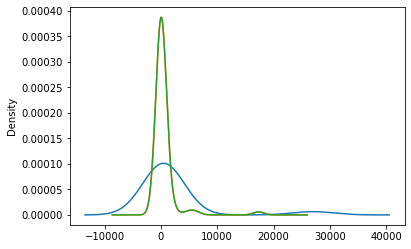

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=5,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks=[cp_callback])

# Restore the model weights
nn.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Deliverable 3: Model Optimization Attempt #8

### Changes
Dropped: EIN, NAME, STATUS ASK_AMT
Binned: Application_Counts: <156 ; Classification_Counts <1883
Hidden Layers: hidden_nodes_layer1 = 80; hidden_nodes_layer2 = 30
Activation Functions: hidden layers - tanh ; output - sigmoid
Epochs: 50

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 80)                3440      
                                                                 
 dense_35 (Dense)            (None, 30)                2430      
                                                                 
 dense_36 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


783/804 [============================>.] - ETA: 0s - loss: 0.5698 - accuracy: 0.7206
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7217
Epoch 2/100
802/804 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7310
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7309
Epoch 3/100
783/804 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7313
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7312
Epoch 4/100
792/804 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7319
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7321
Epoch 5/100
803/804 [============================>.] - E

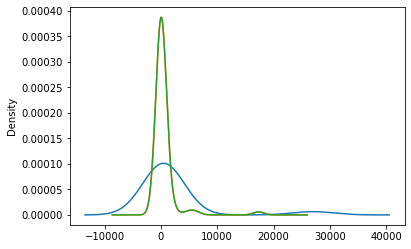

In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS"], axis=1, inplace=True)
application_df
# Determine the number of unique values in each column.
application_df.nunique()
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df['APPLICATION_TYPE'].value_counts()
application_counts
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df.CLASSIFICATION.value_counts()
classification_counts
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()
# Look at CLASSIFICATION value counts for binning
ask_counts=application_df.ASK_AMT.value_counts()
ask_counts
# Drop the ASK_AMT.
application_df.drop(["ASK_AMT"], axis=1, inplace=True)
application_df
# Generate our categorical variable lists
cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat
application_df.dtypes
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat,1)
application_df.head()
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=5,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Restore the model weights
nn.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")